## PROBLEM STATEMENT 1-
### identify the number of clusters formed and draw inferences.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering


import warnings
warnings.filterwarnings("ignore")

In [5]:
## Reading the data

In [3]:
crime = pd.read_csv("E:\\deeksha\\python\\data\\crime_data.csv")

In [6]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
# Normalization function
# using sklearn library norm

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [10]:
# Normalized data frame (considering the numerical part of data)
df_crime = norm_func(crime.iloc[:,1:])


In [11]:
df_crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


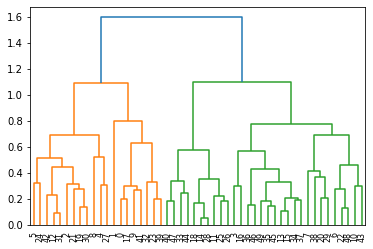

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_crime, method='complete'))

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')


In [14]:
hc.fit(df_crime)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(df_crime)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [16]:
crime['h_clusterid'] = y_hc

In [17]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [14]:
crime1=crime.sort_values("h_clusterid")
crime1.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterid
0,Alabama,0
17,Louisiana,0
23,Mississippi,0
32,North Carolina,0
39,South Carolina,0
9,Georgia,0
1,Alaska,0
41,Tennessee,0
43,Utah,1
38,Rhode Island,1


## PROBLEM STATEMENT 2-
### Perform clustering for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [20]:
## Reading the data

In [18]:
xls = pd.ExcelFile('E:\\deeksha\\python\\data\\EastWestAirlines.xlsx')
df_air = pd.read_excel(xls, 'data')

In [21]:
## Performing EDA on data

In [19]:
df_air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
df_air.shape


(3999, 12)

In [22]:
df_air.size

47988

In [23]:
df_air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [24]:
X = df_air.iloc[:,:-1]

In [25]:
y= df_air["Award?"]

In [26]:
X.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143,0,1,1,1,174,1,0,0,7000
1,2,19244,0,1,1,1,215,2,0,0,6968
2,3,41354,0,1,1,1,4123,4,0,0,7034
3,4,14776,0,1,1,1,500,1,0,0,6952
4,5,97752,0,4,1,1,43300,26,2077,4,6935


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Award?, dtype: int64

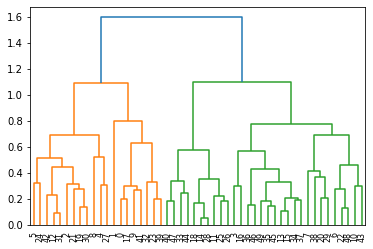

In [28]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_crime, method='complete'))

In [29]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')


In [30]:
hc.fit(df_air)
# hc.predict(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [31]:
# save clusters for chart
y_hc = hc.fit_predict(df_air)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [32]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
df_air['h_clusterid'] = y_hc

In [34]:
df_air1=df_air.sort_values("h_clusterid")
df_air1.iloc[:,[0,-1]]

,ID#,h_clusterid
0,1,0
2658,2678,0
2659,2679,0
2660,2680,0
2661,2681,0
...,...,...
117,120,2
1939,1956,2
1115,1127,2
1188,1200,2
